# **Stock Price Prediction And Forecasting Using Stacked LSTM**

In [3]:
# importing necessary libraries
import pandas_datareader as pdr
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
apiKey = "_"

In [5]:
# # getting google data upto this date
# df = pdr.get_data_tiingo('AAPL', api_key = apiKey)
# df.head()

In [6]:
# # saving the data to csv file for future processing
# df.to_csv("Datasets/appleData.csv")

In [7]:
# reading the saved dataset
df = pd.read_csv("Datasets/appleData.csv")

In [9]:
# displaying first two records
df.head(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-12 00:00:00+00:00,171.70,172.39,171.461,172.15,18945457,40.815488,40.979511,40.758674,40.922459,75781828,0.0,1.0
1,AAPL,2017-12-13 00:00:00+00:00,172.27,173.54,172.000,172.50,23142242,40.950985,41.252882,40.886802,41.005659,92568968,0.0,1.0


In [10]:
# displaying last two records
df.tail(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1256,AAPL,2022-12-08 00:00:00+00:00,142.65,143.52,141.1,142.36,62128338,142.65,143.52,141.1,142.36,62128338,0.0,1.0
1257,AAPL,2022-12-09 00:00:00+00:00,142.16,145.57,140.9,142.34,76097011,142.16,145.57,140.9,142.34,76097011,0.0,1.0


In [11]:
# Selecting "adjClose" feature
X = df.reset_index()["adjClose"]

In [12]:
X

0        40.815488
1        40.950985
2        40.939099
3        41.355099
4        41.937498
           ...    
1253    146.630000
1254    142.910000
1255    140.940000
1256    142.650000
1257    142.160000
Name: adjClose, Length: 1258, dtype: float64

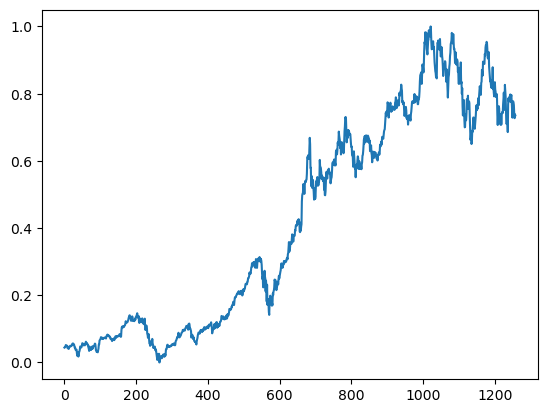

In [26]:
plt.plot(X)

In [27]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# defining scaler object
scaler = MinMaxScaler(feature_range = (0, 1))

In [28]:
# applying scalling
X = scaler.fit_transform(np.array(X).reshape(-1, 1))

In [29]:
# shape of the splitted data
dShape = X.shape[0]
dShape

1258

In [30]:
# specifying the sizes in percentages
trainSize = int(dShape*0.7)
validationSize = int(dShape*0.3)

In [31]:
# displaying the sizes
trainSize, validationSize

(880, 377)

In [32]:
Xtrian = X[:trainSize]
Xval = X[trainSize:trainSize+validationSize]

In [33]:
# displaying training, validation
# Xtrian, Xval

In [34]:
def dataSetCreater(dataset, timeStamp):
    X = [] # Feature matrix
    y = [] # target variable
    for i in range(len(dataset)-timeStamp):
        a = dataset[i:i+timeStamp]
        X.append(a)
        y.append(dataset[i+timeStamp])
        
    return np.array(X), np.array(y)

In [35]:
# Splitting the data into training, testing, and validation
X_train, y_train = dataSetCreater(Xtrian, timeStamp=150)
X_val, y_val = dataSetCreater(Xval, timeStamp=150)

In [36]:
X_train.shape, y_train.shape

((730, 150, 1), (730, 1))

In [37]:
X_val.shape, y_val.shape

((227, 150, 1), (227, 1))

In [38]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [39]:
model = Sequential()
model.add(LSTM(100,input_shape = (150, 1),return_sequences=True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.summary()

2022-12-21 23:29:42.006842: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 23:29:42.010058: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 150, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [41]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 19s 604ms/step - loss: 0.0165 - val_loss: 0.0156
Epoch 2/100
23/23 [==============================] - 16s 713ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 3/100
23/23 [==============================] - 18s 810ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 4/100
23/23 [==============================] - 17s 724ms/step - loss: 9.5243e-04 - val_loss: 0.0042
Epoch 5/100
23/23 [==============================] - 17s 711ms/step - loss: 9.1961e-04 - val_loss: 0.0034
Epoch 6/100
23/23 [==============================] - 14s 613ms/step - loss: 9.3724e-04 - val_loss: 0.0027
Epoch 7/100
23/23 [==============================] - 16s 716ms/step - loss: 9.5787e-04 - val_loss: 0.0028
Epoch 8/100
23/23 [==============================] - 12s 539ms/step - loss: 8.4661e-04 - val_loss: 0.0047
Epoch 9/100
23/23 [==============================] - 13s 560ms/step - loss: 9.1132e-04 - val_loss: 0.0025
Epoch 10/100
23/23 [==============================] - 20s 

## **Evaluation**

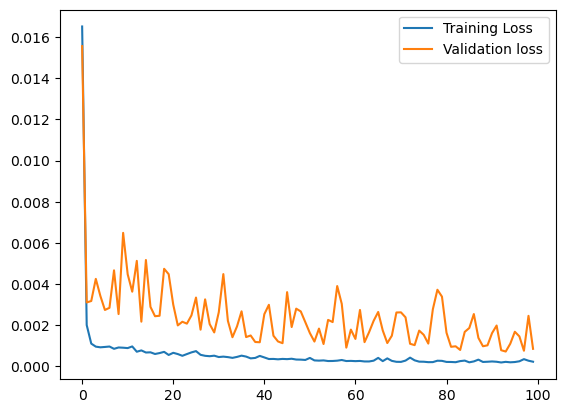

In [42]:
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [43]:
model.save("TSFmodel")

2022-12-22 00:06:42.287049: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: TSFmodel/assets


INFO:tensorflow:Assets written to: TSFmodel/assets


In [44]:
from tensorflow.keras.models import load_model
model = load_model("TSFmodel")

In [45]:
# making prediction on validation set
y_valPred = model.predict(X_val)
y_trainPred = model.predict(X_train)

In [46]:
# Transform back to original form
y_valPred = scaler.inverse_transform(y_valPred)
y_trainPred = scaler.inverse_transform(y_trainPred)

In [47]:
# Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_train, y_trainPred)))
print(math.sqrt(mean_squared_error(y_val, y_valPred)))

0.01418740975775908
0.029078820631010183


In [48]:
len(y_trainPred)

730

### **Plotting Original set, Training and Validation set predictions**

In [49]:
# time stamp 
# first prediction starts after this time stamp
stamp = 150

**Preparing for Ploting prediction on training set**

In [50]:
# Original array shape
print(f"Original array shape: {X.shape}")
trainingPredPlot = np.empty_like(X)
trainingPredPlot[:] = np.nan

# Shipting the training prediction 150 time stamp and assigning training prediction values to this phase
trainingPredPlot[stamp:len(y_trainPred)+stamp] = y_trainPred

# empty array shape
print(f"Empty array shape: {trainingPredPlot.shape}")

Original array shape: (1258, 1)
Empty array shape: (1258, 1)


In [51]:
# shape of the training prediction set
print(len(y_trainPred))

# Time stamp, Training set length, Time Stamp, validation set length + 1
150+730+150+227+1

730


1258

### **Preparing for Ploting prediction on training set and Validation set**

In [52]:
testingPredPlot = np.empty_like(X)
testingPredPlot[:] = np.nan
testingPredPlot[len(y_trainPred)+(stamp*2)+1:] = y_valPred

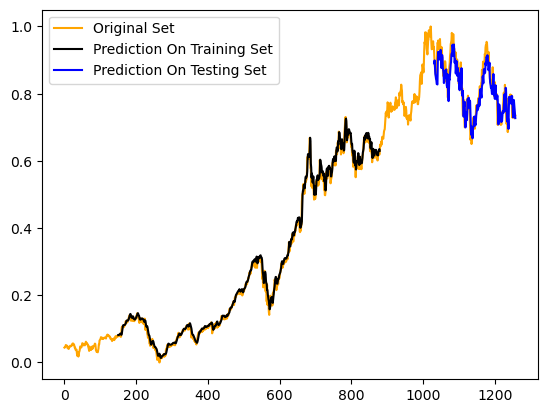

In [53]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X), label = "Original Set", color = "orange")
plt.plot(trainingPredPlot, label = "Prediction On Training Set", color = "black")
plt.plot(testingPredPlot, label = "Prediction On Testing Set", color = "blue")
plt.legend()
plt.show()

In [54]:
# length of test set
len(Xval)

377

In [55]:
# As we have trained the model on 150 time stamp 
# so we will pass the last 150 values to the model to predict on
x_input = np.array(Xval[227:]).reshape(1, -1)
x_input.shape

(1, 150)

In [56]:
# converting it into list to pass it to the model for prediction
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
# temp_input

### **Prediction for the next 60 Days** 

In [58]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<60):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.739501416683197], [0.7426221370697021], [0.7418414950370789], [0.7400457262992859], [0.7385593056678772], [0.7376468777656555], [0.7371676564216614], [0.736952543258667], [0.7369107007980347], [0.7370097041130066], [0.737237274646759], [0.7375783324241638], [0.7380125522613525], [0.7385157346725464], [0.7390643954277039], [0.7396367192268372], [0.7402140498161316], [0.7407810091972351], [0.7413235902786255], [0.7418308854103088], [0.7422938346862793], [0.7427050471305847], [0.7430593371391296], [0.7433528304100037], [0.7435839176177979], [0.7437517046928406], [0.7438575029373169], [0.7439031004905701], [0.7438921332359314], [0.743828296661377], [0.7437163591384888], [0.7435613870620728], [0.7433691024780273], [0.7431454658508301], [0.7428959012031555], [0.7426265478134155], [0.7423428893089294], [0.7420506477355957], [0.741754412651062], [0.7414587140083313], [0.7411681413650513], [0.7408857941627502], [0.7406153082847595], [0.7403590083122253], [0.7401191592216492], [0.73989737033

In [59]:
len(lst_output)

60

In [60]:
day_new=np.arange(1,151)
day_pred=np.arange(151,211)

In [61]:
len(day_pred)

60

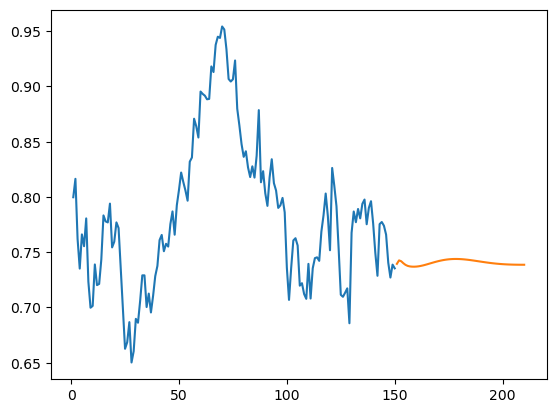

In [62]:

plt.plot(day_new, scaler.inverse_transform(X[1108:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

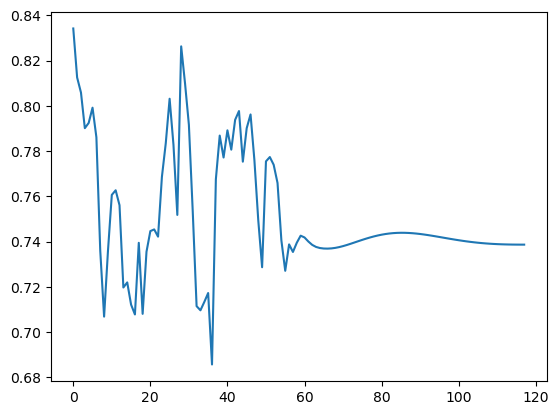

In [63]:
df_=X.tolist()
df_.extend(lst_output)
plt.plot(df_[1200:])

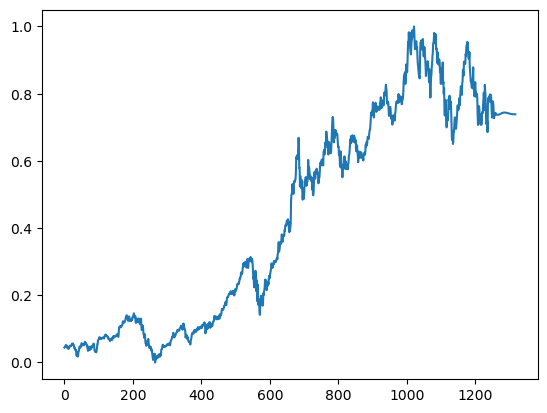

In [64]:
plt.plot(scaler.inverse_transform(df_[:]))